('BMI:', 28.34)

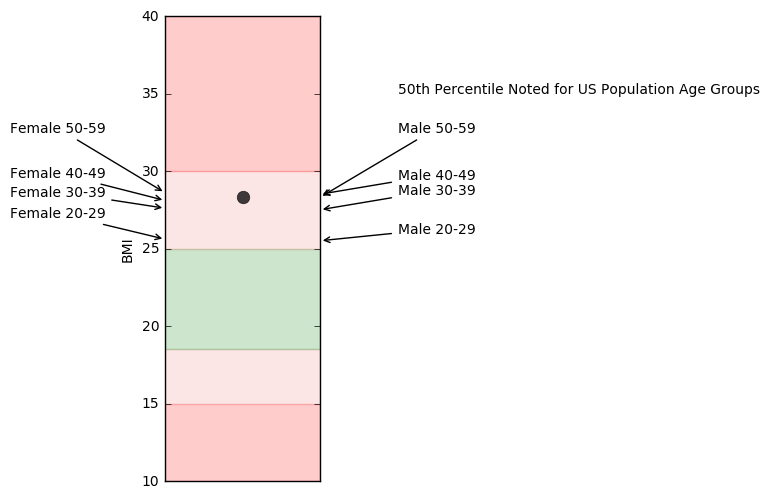

In [202]:
%matplotlib inline
from matplotlib  import patches
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interactive
from IPython.display import display

def slider(weight, height_feet, height_in):

    #assign output variables
    height = height_feet*12 + height_in
    bmi_text = "BMI:"
    bmi_value = round(weight/height**2 * 703, 2)
    
    #setup plot https://matplotlib.org/api/axes_api.html#axis-limits
    fig = plt.figure(figsize=(2,6))
    bmi_plot = fig.add_subplot(1, 1, 1) #http://stackoverflow.com/a/3584933/3059421
    bmi_plot.set_xticks([])
    bmi_plot.set_xlim(-1,1)
    bmi_plot.set_ylim(10,40)
    bmi_plot.set_ylabel("BMI")
    plt.plot(bmi_value,lw=2,marker='o', ms = 9, alpha=.75, color='black')
    #plt.plot((-1, 1), (25, 25), 'k-', c='r')
    
    #set shading colors http://matthiaseisen.com/pp/patterns/p0203/
    severe_under = patches.Rectangle((-1, 10), 2, 5, alpha=0.2, color ='red')#fill=False)
    under = patches.Rectangle((-1, 15), 2, 3.5, alpha=0.2, color ='lightcoral')
    okay = patches.Rectangle((-1, 18.5), 2, 6.5, alpha=0.2, color ='g')
    over = patches.Rectangle((-1, 25), 2, 5, alpha=0.2, color ='lightcoral')
    ob =  patches.Rectangle((-1, 30), 2, 10, alpha=0.2, color ='red')
    #plot shading colors
    bmi_plot.add_artist((severe_under)); bmi_plot.add_artist((under)); bmi_plot.add_artist((okay)); 
    bmi_plot.add_artist((over)); bmi_plot.add_artist((ob));
    
    #annotations for ages #https://matplotlib.org/users/annotations_intro.html
    bmi_plot.text(2,35,'50th Percentile Noted for US Population Age Groups')
    ap = dict(facecolor='black',  arrowstyle="->") #setup style so I don't have to repeat it each time
    bmi_plot.annotate('Male 20-29', xy=(1, 25.5), xytext=(2, 26), arrowprops = ap) 
    bmi_plot.annotate('Male 30-39', xy=(1, 27.5), xytext=(2, 28.5), arrowprops = ap) 
    bmi_plot.annotate('Male 40-49', xy=(1, 28.5), xytext=(2, 29.5), arrowprops = ap) 
    bmi_plot.annotate('Male 50-59', xy=(1, 28.3), xytext=(2, 32.5), arrowprops = ap) 
    bmi_plot.annotate('Female 20-29', xy=(-1, 25.6), xytext=(-3, 27), arrowprops = ap) 
    bmi_plot.annotate('Female 30-39', xy=(-1, 27.6), xytext=(-3, 28.4), arrowprops = ap) 
    bmi_plot.annotate('Female 40-49', xy=(-1, 28.1), xytext=(-3, 29.6), arrowprops = ap) 
    bmi_plot.annotate('Female 50-59', xy=(-1, 28.6), xytext=(-3, 32.5), arrowprops = ap)     
    
    #return values to display
    return bmi_text, bmi_value

#setup default sliders to get a min and max (and avoid having -2'4" foot tall people)
height_feet_slider = widgets.IntSlider(min=0, max=10, step=1, value=5, description= 'Height (feet)', continuous_update=False)
height_inch_slider = widgets.IntSlider(min=0, max=12, step=1, value=1, description= 'Height (inches)', continuous_update=False)
weight_slider      = widgets.IntSlider(min=0, max=400, step=1, value=150, description= 'Weight (pounds)', continuous_update=False)

BMI = interactive(slider, weight= weight_slider, height_feet = height_feet_slider, height_in = height_inch_slider)
display(BMI)
